In [1]:
import pandas as pd
import cv2
print("done")

done


In [2]:
!pip install scikit-image


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [3]:
from __future__ import print_function
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage import io
print("done")

done


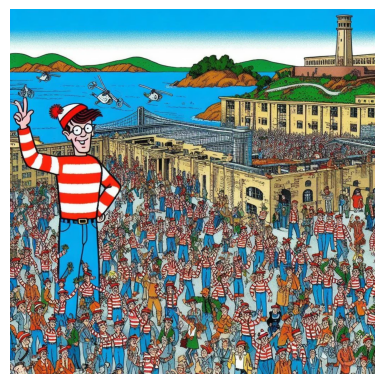

In [8]:
def plotimg(img):
    plt.figure(figsize=(16, 12))  # Set the figure size to 10x6 inches
    plt.subplot(1, 3, (0 * 3) + 1)
    plt.imshow(img)
    plt.axis('off')
plotimg(io.imread('waldo2.jpeg'))
image = io.imread('waldo2.jpeg') #rgb image

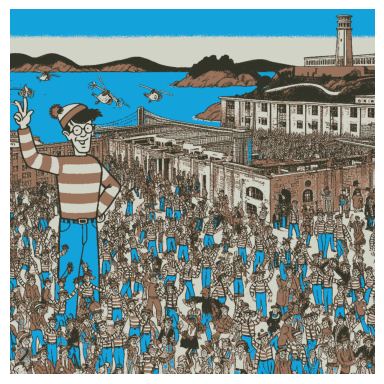

In [9]:
from utils import my_features

pix = image.reshape((image.shape[0]*image.shape[1],3))
pix = np.float32(pix)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

clusternum = 4
assignments, centers = my_features(pix, clusternum, num_iters=100) #need centers, edited kmeans a bit
centers = np.uint8(centers)
segments = centers[assignments]

segmented_image = segments.reshape(image.shape)
plotimg(segmented_image)



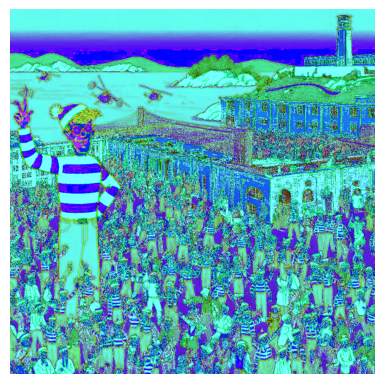

In [10]:
BLUE = (0,0,255)
RED = (255,0,0)
GREEN = (0,255,0)
cluster = 3
maskcat = np.copy(image)
rightshape = assignments.reshape(image.shape[0], image.shape[1])
maskcat[rightshape == cluster] = [BLUE] #green and red hurt my eyes

hsv_img = cv2.cvtColor(maskcat, cv2.COLOR_RGB2HSV) #make hsv
plotimg(hsv_img)

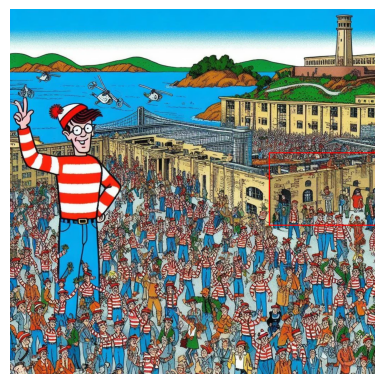

In [12]:
hsv_blue = cv2.cvtColor(np.uint8([[[255,0,0]]]), cv2.COLOR_BGR2HSV)

# Define lower and upper bounds for the blue color in HSV
lower_blue, upper_blue = np.array([120, 255, 250], np.uint8), np.array([120, 255, 255], np.uint8)


myrange = cv2.inRange(hsv_img, lower_blue, upper_blue) # looking for specific hue of blue
contours, _ = cv2.findContours(myrange, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Contours = curves joining all the continuous points along the boundary of the same color/intensity
#basically same color, points dotted on the outline of obj (train)
#more easily detected where there is a clear contrast between the object and the background
#train prob has more solid contour due to defined edges (vs thing like trees on left)


if contours: #find bounding rectangle (biggest contour)
    max_index = np.argmax([cv2.contourArea(c) for c in contours])
    cnt = contours[max_index]
    x, y, w, h = cv2.boundingRect(cnt)

    
    pad = (3, 4)#some padding
    cv2.rectangle(image, (x-pad[0], y-pad[1]), (x+w+pad[0], y+h+pad[1]), (255,0,0), 2)

    plotimg(image);